<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> Importing Required Libraries </div>

In [1]:
import pandas as pd
import numpy as np
import pycountry
import pycountry_convert as pc
import os
import warnings
warnings.filterwarnings("ignore")

# Styling libraries
from colorama import Fore
from colorama import Style

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

# Data prossesing
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> Loading the DataSet </div>

In [2]:
data_set = 'ds_salaries.csv'
notebook_path = os.path.abspath("project.ipynb")
path = os.path.join(os.path.dirname(notebook_path), data_set)
data = pd.read_csv(path)

# Display the DataSet
data.head(10)

work_year experience_level employment_type                 job_title   
0       2023               SE              FT  Principal Data Scientist  \
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   
5       2023               SE              FT         Applied Scientist   
6       2023               SE              FT         Applied Scientist   
7       2023               SE              FT            Data Scientist   
8       2023               SE              FT            Data Scientist   
9       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio   
0   80000             EUR          85847                 ES           100  \
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   
5  222200             USD         222200                 US             0   
6  136000             USD         136000                 US             0   
7  219000             USD         219000                 CA             0   
8  141000             USD         141000                 CA             0   
9  147100             USD         147100                 US             0   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M  
5               US            L  
6               US            L  
7               CA            M  
8               CA            M  
9               US            M

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> Understanding the Dataset  </div>

**1.1 Shape of the dataset**

In [3]:
print(f"Number of rows and columns in the dataset: {Fore.BLUE}{data.shape}{Style.RESET_ALL}")

Number of rows and columns in the dataset: (3755, 11)


**1.2) Basic information about the columns**

In [4]:
# Loop through each column and count the number of distinct values
for column in data.columns:
    num_distinct_values = len(data[column].unique())
    print(f"{column}: {Fore.BLUE}{num_distinct_values}{Style.RESET_ALL} distinct values")

work_year: 4 distinct values
experience_level: 4 distinct values
employment_type: 4 distinct values
job_title: 93 distinct values
salary: 815 distinct values
salary_currency: 20 distinct values
salary_in_usd: 1035 distinct values
employee_residence: 78 distinct values
remote_ratio: 3 distinct values
company_location: 72 distinct values
company_size: 3 distinct values


**1.2) Test for duplicate culumns**

In [5]:
duplicate_rows_number = data.duplicated().sum()
print(f"number of duplicate rows: {Fore.RED}{duplicate_rows_number}{Style.RESET_ALL}")

number of duplicate rows: 1171


**1.3) Show duplicate culumns**

In [6]:
duplicateRows = data[data.duplicated()]
duplicateRows

work_year experience_level employment_type           job_title  salary   
115        2023               SE              FT      Data Scientist  150000  \
123        2023               SE              FT  Analytics Engineer  289800   
153        2023               MI              FT       Data Engineer  100000   
154        2023               MI              FT       Data Engineer   70000   
160        2023               SE              FT       Data Engineer  115000   
...         ...              ...             ...                 ...     ...   
3439       2022               MI              FT      Data Scientist   78000   
3440       2022               SE              FT       Data Engineer  135000   
3441       2022               SE              FT       Data Engineer  115000   
3586       2021               MI              FT       Data Engineer  200000   
3709       2021               MI              FT      Data Scientist   76760   

     salary_currency  salary_in_usd employee_residence  remote_ratio   
115              USD         150000                 US             0  \
123              USD         289800                 US             0   
153              USD         100000                 US           100   
154              USD          70000                 US           100   
160              USD         115000                 US             0   
...              ...            ...                ...           ...   
3439             USD          78000                 US           100   
3440             USD         135000                 US           100   
3441             USD         115000                 US           100   
3586             USD         200000                 US           100   
3709             EUR          90734                 DE            50   

     company_location company_size  
115                US            M  
123                US            M  
153                US            M  
154                US            M  
160                US            M  
...               ...          ...  
3439               US            M  
3440               US            M  
3441               US            M  
3586               US            L  
3709               DE            L  

[1171 rows x 11 columns]

**Has we can see we have meny difrent peple that have the exact sullary in the exact company...**

**1.4) Test dataset for missing values**

In [7]:
num_of_null = data.isnull().sum().sum()
print(f"Number of missing data in the dataset: {Fore.RED}{num_of_null}{Style.RESET_ALL}")

Number of missing data in the dataset: 0


<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> Rename the value for better understanding </div>

In [8]:
data['experience_level'] = data['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

data['employment_type'] = data['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
data['company_size'] = data['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
data['remote_ratio'] = data['remote_ratio'].astype(str)
data['remote_ratio'] = data['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})
data.head()

work_year        experience_level employment_type   
0       2023                  Senior       Full-time  \
1       2023  Mid/Intermediate level      Contractor   
2       2023  Mid/Intermediate level      Contractor   
3       2023                  Senior       Full-time   
4       2023                  Senior       Full-time   

                  job_title  salary salary_currency  salary_in_usd   
0  Principal Data Scientist   80000             EUR          85847  \
1               ML Engineer   30000             USD          30000   
2               ML Engineer   25500             USD          25500   
3            Data Scientist  175000             USD         175000   
4            Data Scientist  120000             USD         120000   

  employee_residence remote_ratio company_location company_size  
0                 ES  Full-Remote               ES        LARGE  
1                 US  Full-Remote               US        SMALL  
2                 US  Full-Remote               US        SMALL  
3                 CA  Full-Remote               CA       MEDIUM  
4                 CA  Full-Remote               CA       MEDIUM

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> Categorase the Job titels and crate new column "job_category" </div>

In [9]:
def job_category(job_title):
    # Grup the titels in to simular categoris
    data_engineering = ["Data Engineer",
                        "Data Analyst",
                        "Analytics Engineer",
                        "BI Data Analyst",
                        "Business Data Analyst",
                        "BI Developer",
                        "BI Analyst",
                        "Business Intelligence Engineer",
                        "BI Data Engineer",
                        "Power BI Developer"]
    
    data_scientist = ["Data Scientist",
                      "Applied Scientist",
                      "Research Scientist",
                      "3D Computer Vision Researcher",
                      "Deep Learning Researcher",
                      "AI/Computer Vision Engineer"]
    
    machine_learning = ["Machine Learning Engineer",
                        "ML Engineer",
                        "Lead Machine Learning Engineer",
                        "Principal Machine Learning Engineer"]
    
    data_architecture = ["Data Architect",
                         "Big Data Architect",
                         "Cloud Data Architect",
                         "Principal Data Architect"]
    
    management = ["Data Science Manager",
                  "Director of Data Science",
                  "Head of Data Science",
                  "Data Scientist Lead",
                  "Head of Machine Learning",
                  "Manager Data Management",
                  "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title'
data['job_category'] = data['job_title'].apply(job_category)

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> Univariate Analysis </div>

**2.1) Experience level**

In [10]:
ep_level = data["experience_level"].value_counts()
fig = px.treemap(ep_level, path = [ep_level.index], values = ep_level.values, 
                 title = 'Experience Level')
fig.show()

**2.2) Top 10 job titles in 2023**

In [11]:
jobs = data[data['work_year']==2023]['job_title'].value_counts().nlargest(10)

fig = px.bar(y = jobs.values, x = jobs.index, color = jobs.index,
                   text = jobs.values, title = 'Top 10 Job Titles in 2023')
fig.update_layout(xaxis_title = "Job Designations", yaxis_title = "Count")
fig.show()

**2.3) Employment type distribution**

In [12]:
group = data['employment_type'].value_counts()

fig = px.bar(x = data['employment_type'].value_counts().index, y = group.values, 
       color = group.index, text = group.values, 
       title = 'Employment Type Distribution')

fig.update_layout(xaxis_title = "Employment Type", yaxis_title = "count")
fig.show()

**2.4) Job distribution percentage**

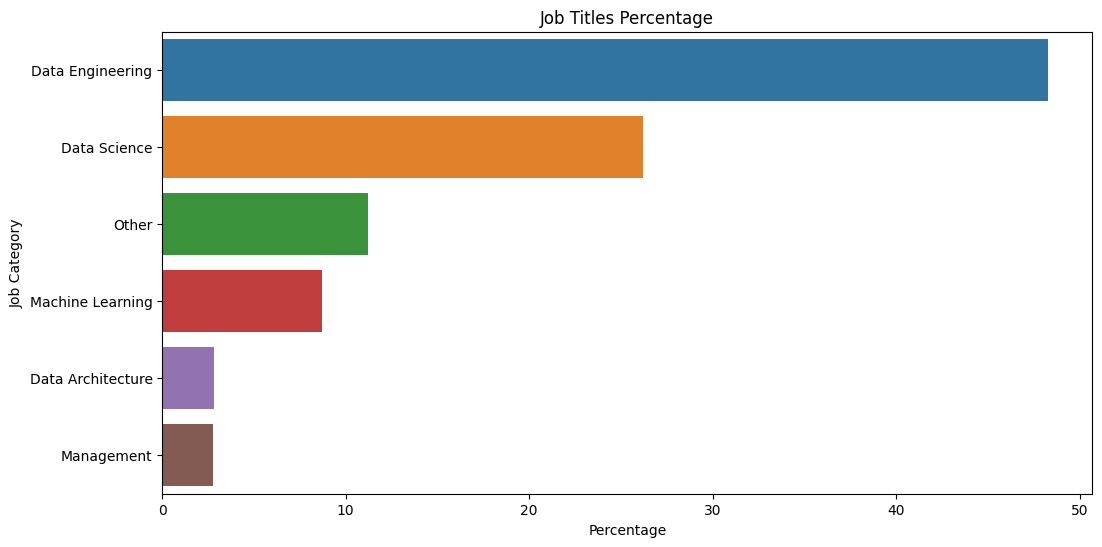

In [13]:
value_counts = data['job_category'].value_counts(normalize=True) * 100

fig, axis = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
axis = sns.barplot(y =value_counts.index[:top_n], x = value_counts.values[:top_n])

# Set axis labes and grath title
axis.set_xlabel('Percentage')
axis.set_ylabel('Job Category')
axis.set_title('Job Titles Percentage')
plt.show()

**2.5) Salaty distribution across different job categories in 2023**

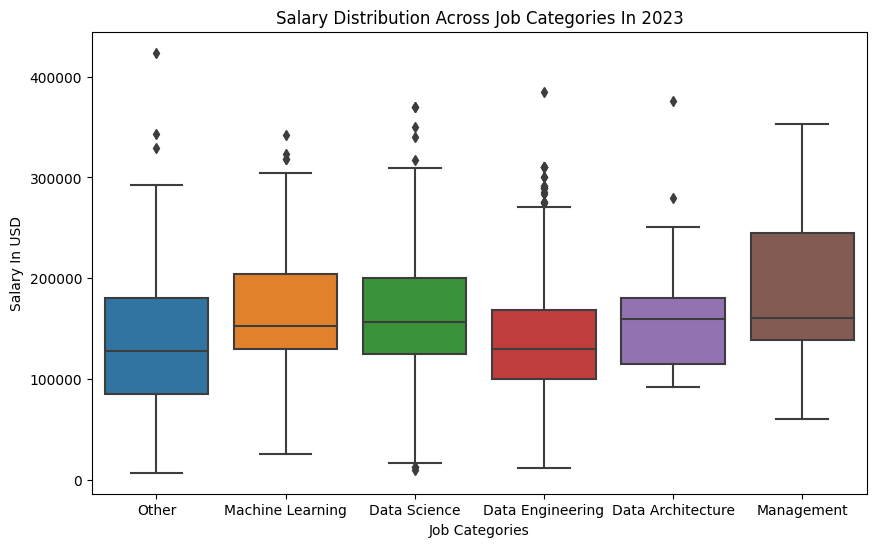

In [14]:
# Salary distribution across different job categories in 2023
salary = data[data['work_year']==2023]

plt.figure(figsize=(10, 6))
sns.boxplot(data=salary, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution Across Job Categories In 2023')
plt.xlabel('Job Categories')
plt.ylabel('Salary In USD')
plt.show()

**2.6) Salaty distribution across top 10 job titels in 2023**

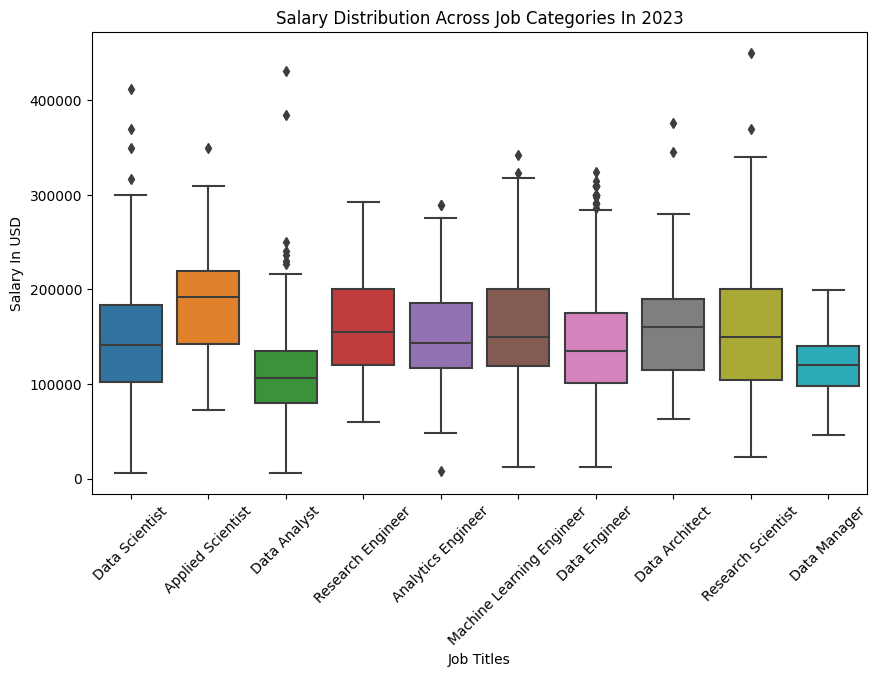

In [15]:
top_ten = data[data['work_year']==2023]['job_title'].value_counts().nlargest(10).index
top_ten_data = data[data['job_title'].isin(top_ten)]


plt.figure(figsize=(10, 6))
sns.boxplot(data=top_ten_data, x='job_title', y='salary_in_usd')
plt.title('Salary Distribution Across Job Categories In 2023')
plt.xlabel('Job Titles')
plt.ylabel('Salary In USD')
plt.xticks(rotation=45)
plt.show()

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> GEOSPATIAL ANALYSIS </div>

**3.1) Convert the country code to the country name**

In [16]:
# Function to convert ISO 3166 country code to country name
def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code
    # Function to convert country code to full name
def country_code_to_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return None

**3.2) Average salary by location of the organization**

In [17]:
df = data.copy()

# Convert country codes to names
df['company_location'] = df['company_location'].apply(country_code_to_name)
df['employee_residence'] = df['employee_residence'].apply(country_code_to_name)


# Average salary by company_location
avg_salary_by_location = df.groupby('company_location', as_index=False)['salary_in_usd'].mean()

fig1 = px.choropleth(avg_salary_by_location,
                     locations='company_location',
                     locationmode='country names',
                     color='salary_in_usd',
                     hover_name='company_location',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     title='Average Salary by Company Location',
                     labels={'salary_in_usd': 'Average Adjusted Salary'},
                     projection='natural earth')

fig1.show()

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> Data Processing and Feature Engineering </div>

**4.1) Map the contrys to the correct mane**

In [18]:
# create dictionary of country code to country name mappings
country_map = {}
for country in pycountry.countries:
    country_map[country.alpha_2] = country.name
# replace values in 'employee_residence' column using dictionary
data['employee_residence'] = data['employee_residence'].replace(country_map)
data['company_location'] = data['company_location'].replace(country_map)
data.head(1)

work_year experience_level employment_type                 job_title   
0       2023           Senior       Full-time  Principal Data Scientist  \

   salary salary_currency  salary_in_usd employee_residence remote_ratio   
0   80000             EUR          85847              Spain  Full-Remote  \

  company_location company_size job_category  
0            Spain        LARGE        Other

**4.2) Grup the cuntrys in to Continents**

In [19]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


**4.3) Adjusted the income to Present Value**

In [20]:
# Inflation rates
us_inflation_rates = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
global_inflation_rates = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}

# Function to adjust salary
def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return adjusted_salary

**4.4) Applay changest to new data set**

In [21]:
df = data.copy()
df['adjusted_salary'] = data.apply(adjust_salary, axis=1)
df['company_location'] = data['company_location'].apply(country_to_continent)
df['employee_residence'] = data['employee_residence'].apply(country_to_continent)

**4.5) Categorise the Salary and split in to 4 grups**

In [22]:
quarters = [0, 1/4, 2/4, 3/4, 1]
bin_edges = [df['adjusted_salary'].quantile(q) for q in quarters]

# Convert the continuous salary variable into 4 discrete bins based on quantiles
salary_labels = ['low', 'mid', 'high', 'Top']
    
df['salary_range'] = pd.cut(df['adjusted_salary'], bins=bin_edges, labels=salary_labels, include_lowest=True)

In [23]:
drop_list = ['salary',
             'salary_currency',
             'job_title',
             'work_year',
             'salary_in_usd',
             ]

df.drop(drop_list,axis=1,inplace=True)

df.head(1)

experience_level employment_type employee_residence remote_ratio   
0           Senior       Full-time             Europe  Full-Remote  \

  company_location company_size job_category  adjusted_salary salary_range  
0           Europe        LARGE        Other          85847.0          low

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> PREDICTIVE ANALYSIS </div>

**6.1) Encode DataSet**

In [24]:
df.head(1)

experience_level employment_type employee_residence remote_ratio   
0           Senior       Full-time             Europe  Full-Remote  \

  company_location company_size job_category  adjusted_salary salary_range  
0           Europe        LARGE        Other          85847.0          low

**6.2) Save the new DataSet**

In [25]:
new_data_set = 'ds_salaries_clean.csv'
new_path = os.path.join(os.path.dirname(notebook_path), new_data_set)

df.to_csv(new_path)

In [26]:
def encode_data_frame_columns(dataframe):
    # Create a new dataframe with the other columns
    to_drop = ['Data Architecture', 'Data Engineering',
               'Machine Learning', 'Management', 'Other']
    
    frame = dataframe.drop('job_category', axis=1)
    new_dataframe = pd.get_dummies(dataframe['job_category'], dtype=int )
    new_dataframe = new_dataframe.drop(to_drop, axis=1)
    
    for feature in frame.columns:
        frame[feature] = LabelEncoder().fit_transform(frame[feature])
        
    frame = pd.DataFrame(MinMaxScaler().fit_transform(frame.values),
                          columns=frame.columns, index=frame.index)
    
    new_dataframe = new_dataframe.join(frame)
    
    return new_dataframe

new_df = encode_data_frame_columns(df)
new_df.head(3)

Data Science  experience_level  employment_type  employee_residence   
0             0          1.000000         0.666667                 0.4  \
1             0          0.666667         0.000000                 0.6   
2             0          0.666667         0.000000                 0.6   

   remote_ratio  company_location  company_size  adjusted_salary  salary_range  
0           0.0               0.4           0.0         0.282252      0.666667  
1           0.0               0.6           1.0         0.070367      0.666667  
2           0.0               0.6           1.0         0.059421      0.666667

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> CORRELATION </div>

**6.3) Correlation Map**

In [27]:
def plot_correlation_matrix(dataframe):
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()

    # Create a mask for the lower triangle
    mask = np.tril(np.ones_like(corr_matrix, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Plot the correlation matrix
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
                annot=True, fmt=".2f", annot_kws={"size": 10})

    # Set the axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    # Set the plot title
    plt.title("Correlation Matrix")

    # Show the plot
    plt.show()

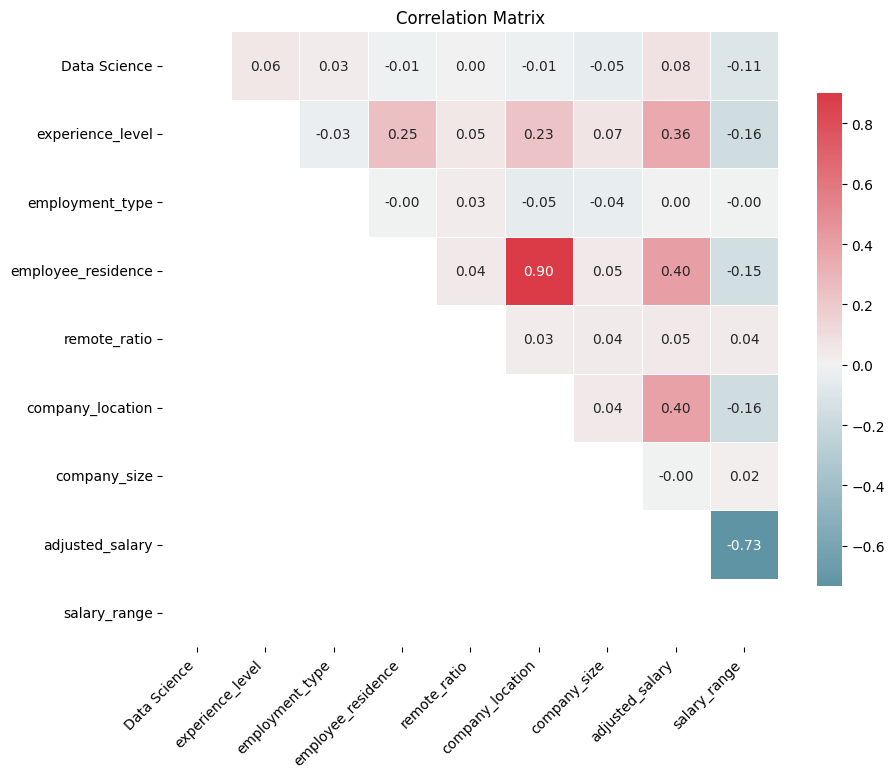

In [28]:
plot_correlation_matrix(new_df)

**6.4) Data spliting**

In [29]:
def split_dataset(dataframe, target_column, test_size=0.2, random_state=None):
    # Separate the features and the target variable
    X = dataframe.drop(target_column, axis=1)
    y = dataframe[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Return the split datasets
    return X_train, X_test, y_train, y_test

In [30]:
train_x, test_x, train_y, test_y = split_dataset(new_df, 'Data Science', random_state=42)

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> Naive Bayes Model </div>

In [31]:
clf = GaussianNB()
clf.fit(train_x, train_y)

GaussianNB()

In [32]:
y_pred = clf.predict(test_x)

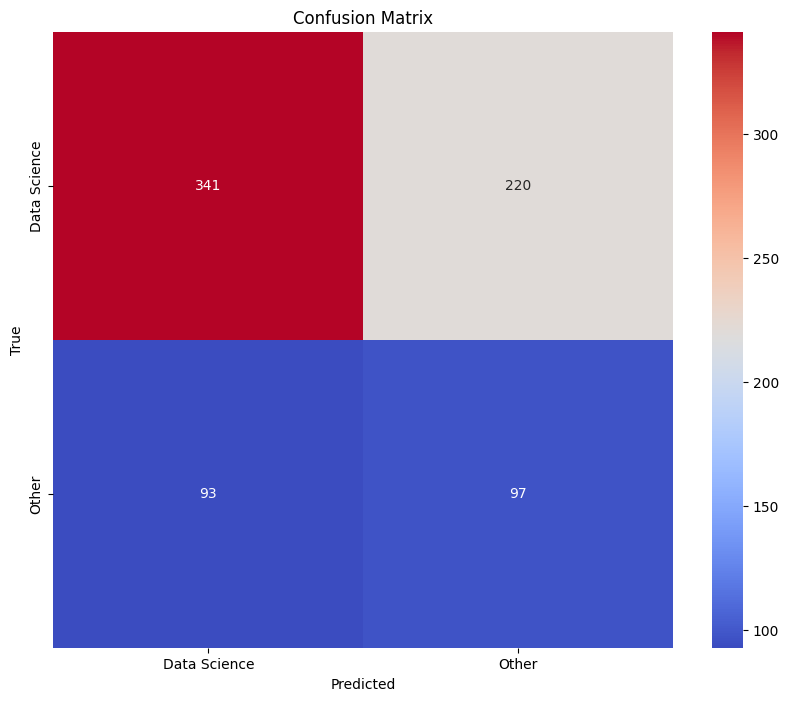

Classification Report:
              precision    recall  f1-score   support

Data Science       0.79      0.61      0.69       561
       Other       0.31      0.51      0.38       190

    accuracy                           0.58       751
   macro avg       0.55      0.56      0.53       751
weighted avg       0.66      0.58      0.61       751



In [33]:
labels = ['Data Science', 'Other']

cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(test_y, y_pred, target_names=labels))

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> Decision Tree Model </div>

In [34]:
DTree = DecisionTreeClassifier(criterion="entropy")

DTree.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy')

In [35]:
y_pred = DTree.predict(test_x)

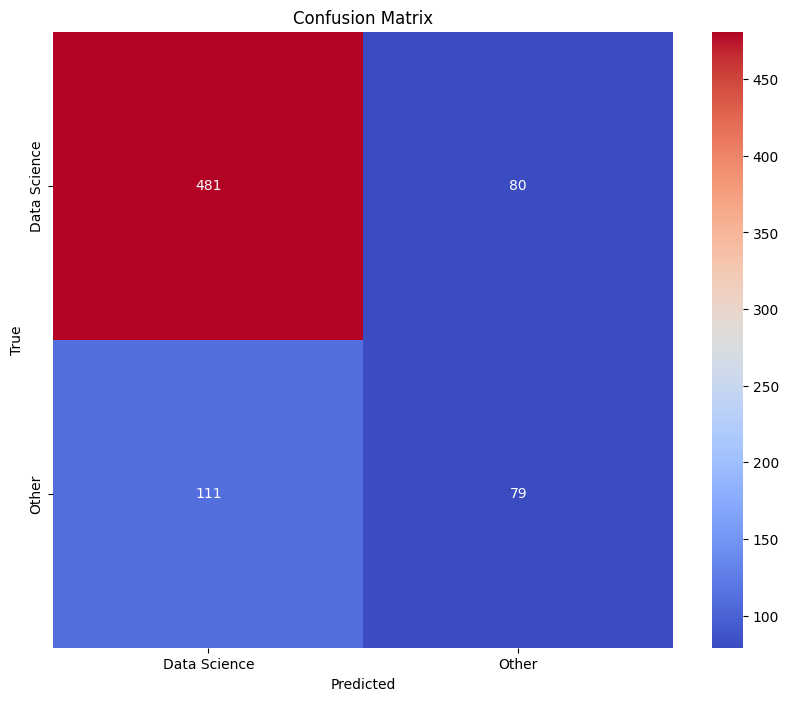

Classification Report:
              precision    recall  f1-score   support

Data Science       0.81      0.86      0.83       561
       Other       0.50      0.42      0.45       190

    accuracy                           0.75       751
   macro avg       0.65      0.64      0.64       751
weighted avg       0.73      0.75      0.74       751



In [36]:
labels = ['Data Science', 'Other']
          
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(test_y, y_pred, target_names=labels))

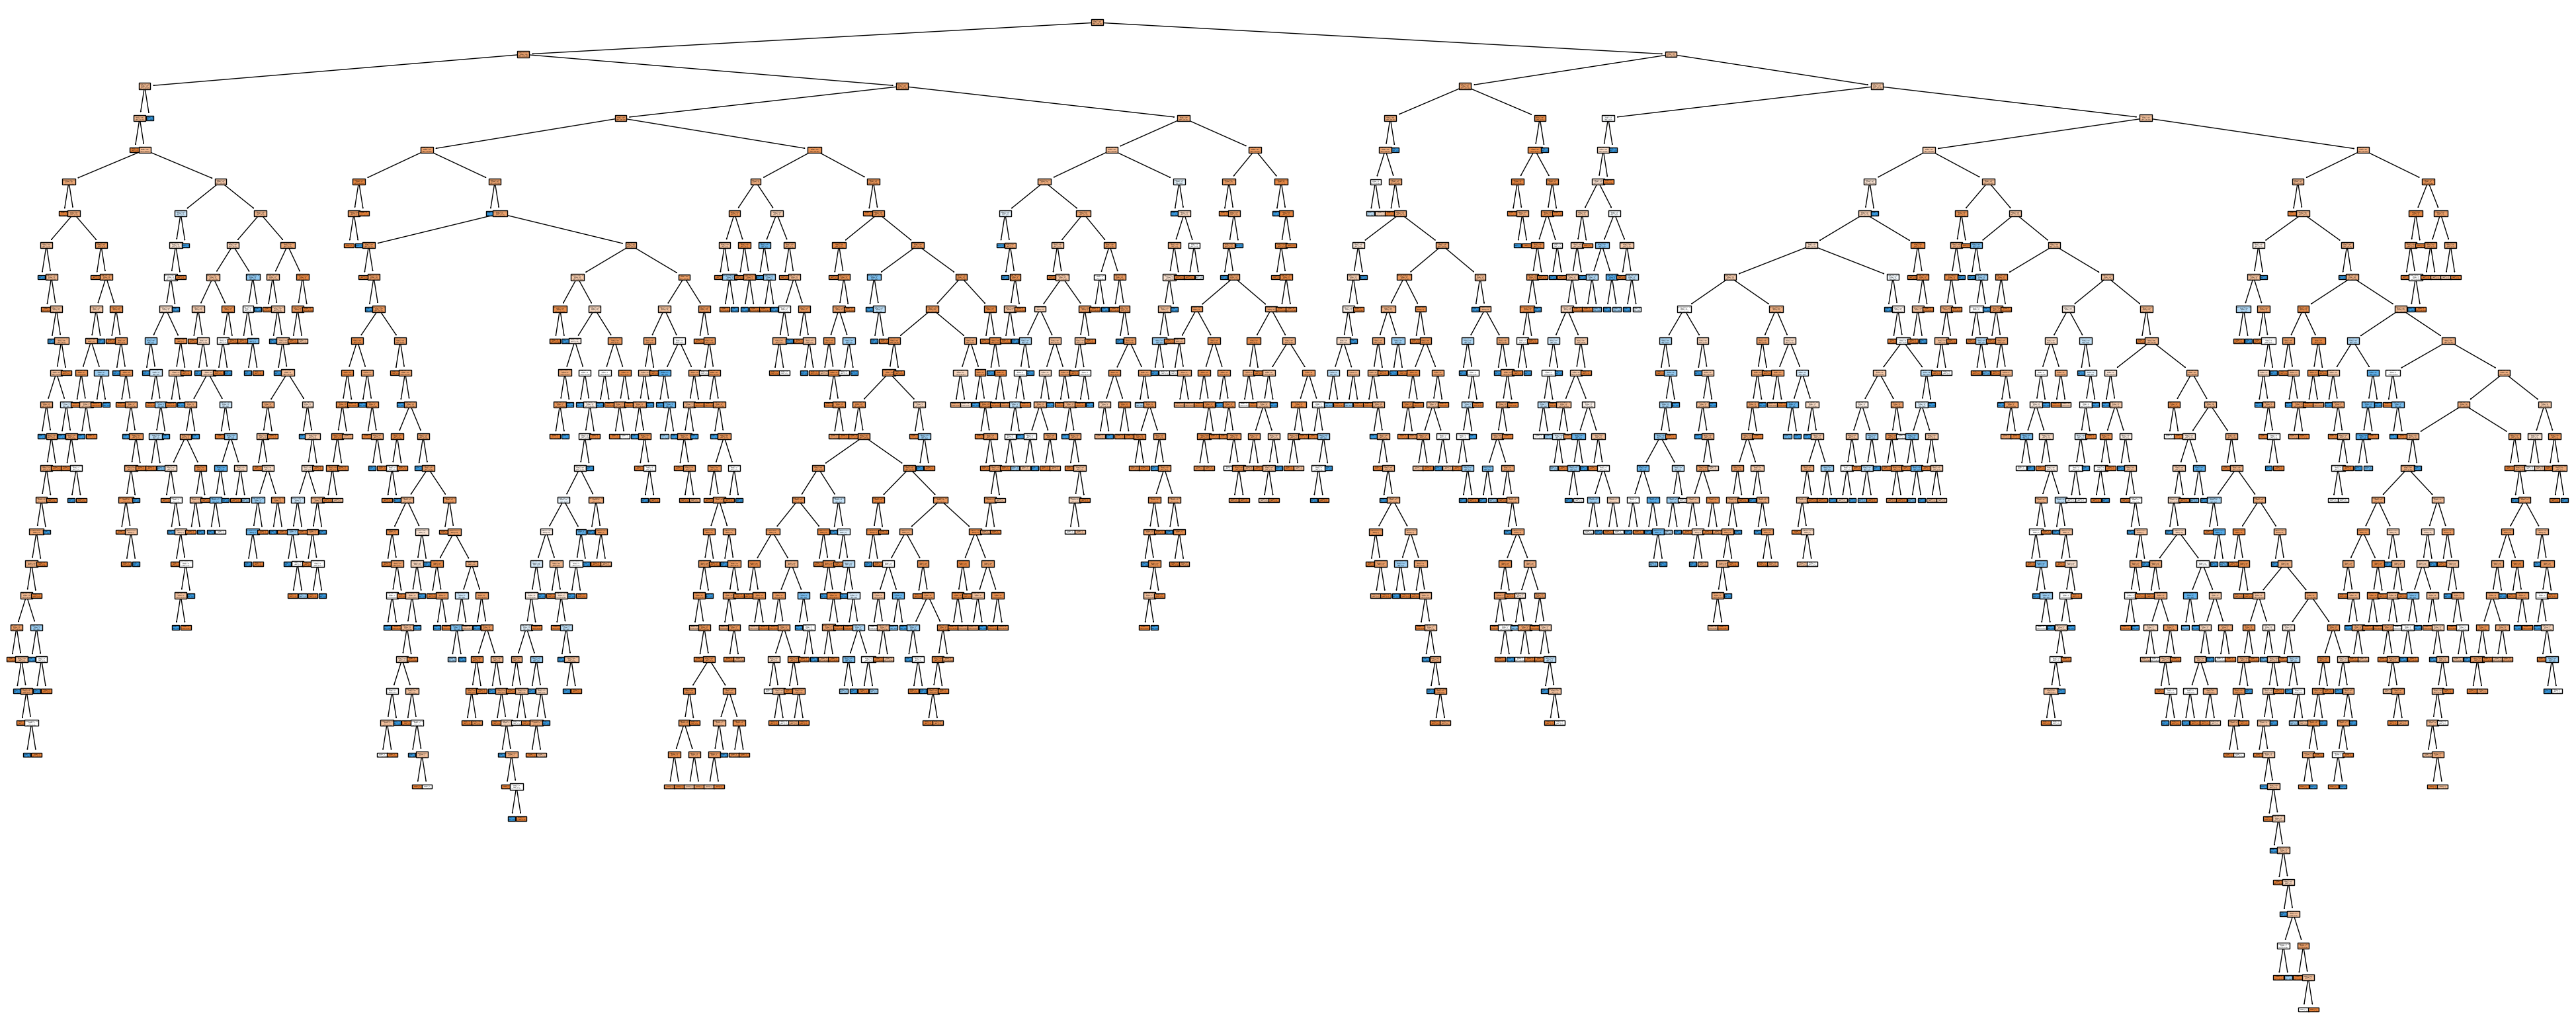

In [37]:
fig = plt.figure(figsize=(50,20))
plot_tree(DTree,
          feature_names=new_df.columns,
          filled=True,
          class_names = labels)
plt.show()
fig.savefig("decistion_tree.png")

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> KNN Model </div>

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [39]:
y_pred_pre = knn.predict(test_x)
accuracy_pre = accuracy_score(test_y, y_pred_pre)
print(f'Accuracy with pre-pruning: {Fore.BLUE}{accuracy_pre}{Style.RESET_ALL}')

Accuracy with pre-pruning: 0.7430093209054593


In [40]:
k_values = [i for i in range (1,100)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, train_x, train_y, cv=5)
    scores.append(np.mean(score))

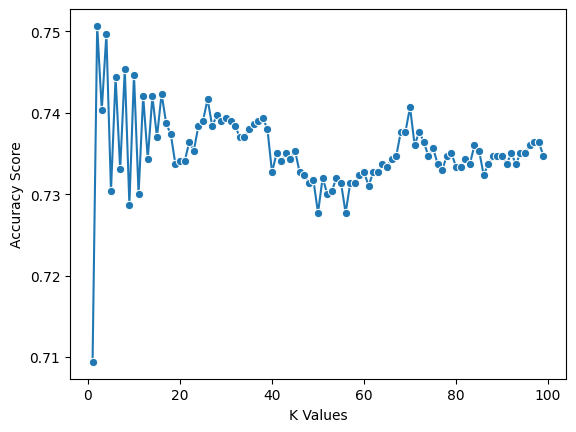

In [41]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [42]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x, train_y)

y_pred = knn.predict(test_x)

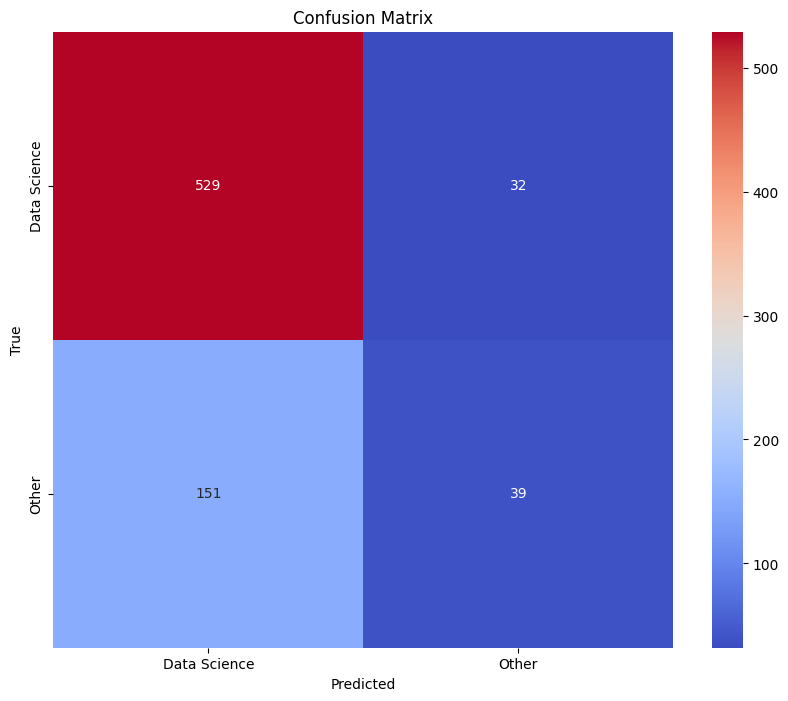

Classification Report:
              precision    recall  f1-score   support

Data Science       0.78      0.94      0.85       561
       Other       0.55      0.21      0.30       190

    accuracy                           0.76       751
   macro avg       0.66      0.57      0.58       751
weighted avg       0.72      0.76      0.71       751



In [43]:
labels = ['Data Science', 'Other']
          
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(test_y, y_pred, target_names=labels))

<div style="padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:120%;text-align: center"> K-MEANS Model </div>

In [44]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(train_x)

In [45]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(train_y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, train_y.size))

Result: 806 out of 3004 samples were correctly labeled.


In [46]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(train_y.size)))

Accuracy score: 0.27


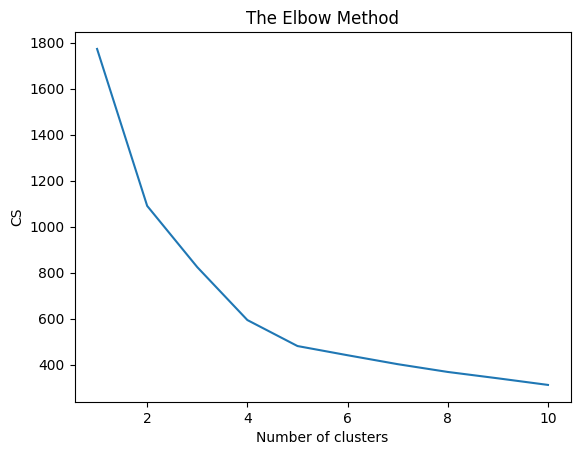

In [47]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(train_x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

**We can see that the moset optimal number of clusters is 2**

In [48]:
kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(train_x)

labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(train_y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, train_y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(train_y.size)))

Result: 1485 out of 3004 samples were correctly labeled.
Accuracy score: 0.49


In [49]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(train_x)

labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(train_y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, train_y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(train_y.size)))

Result: 1573 out of 3004 samples were correctly labeled.
Accuracy score: 0.52


**The result abov is actualy the best result**

In [50]:
y_pred = kmeans.predict(test_x, test_y)

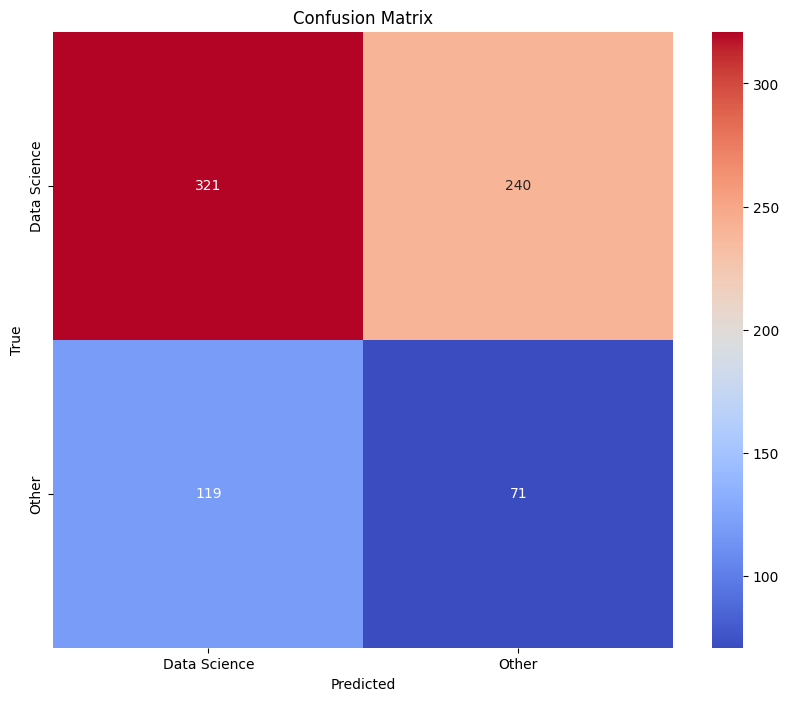

Classification Report:
              precision    recall  f1-score   support

Data Science       0.73      0.57      0.64       561
       Other       0.23      0.37      0.28       190

    accuracy                           0.52       751
   macro avg       0.48      0.47      0.46       751
weighted avg       0.60      0.52      0.55       751



In [51]:
labels = ['Data Science', 'Other']
          
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(test_y, y_pred, target_names=labels))

In [54]:
!jt -t chesterish